In [1]:
# Menginpor library yang dibutuhkan

import keras as kerad
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
# Meloead dataset MNIST

mnist = kerad.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data() #Mendownload dataset berupa data handwriting

In [3]:
# Mencaru informasi pada dataset MNIST

print("Dimensi X_train\t=",X_train.shape)
print("Dimensi y_train\t=",y_train.shape)
print("Dimensi X_test\t=",X_test.shape)
print("Dimensi y_test\t=",y_test.shape)

Dimensi X_train	= (60000, 28, 28)
Dimensi y_train	= (60000,)
Dimensi X_test	= (10000, 28, 28)
Dimensi y_test	= (10000,)


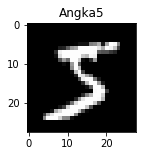

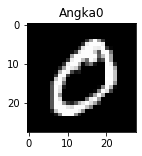

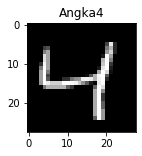

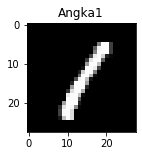

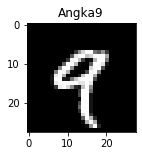

In [4]:
# Menampilkan lima gambar beserta label pada X_train

i = 0
for gambar in X_train[0:5]: # Menampilkan data ke 0-4
    plt.figure(figsize=[2,2]) # Membuat figure dengan ukuran [2x2]
    plt.imshow(gambar, cmap='gray') # Menampilkan gambar data sets dengan color map gray
    plt.title("Angka" + str(y_train[i])) # Menampilkan label
    plt.show() # Menampilkan Seluruhnya
    i += 1

In [5]:
# Melakukan proses normalisasi setiap nilai pixel pada gambar

X_train = kerad.utils.normalize(X_train, axis=1)
X_test = kerad.utils.normalize(X_test, axis=1)

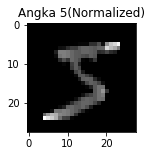

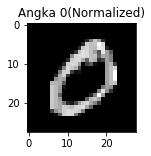

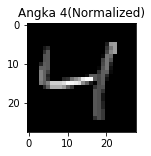

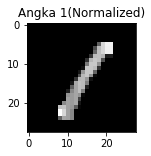

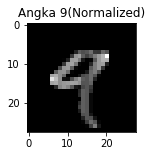

In [6]:
# Menampilkan kembali lima gambar beserta label pada X_train (setelah dinormalisai)

i=0
for gambar in X_train[0:5]: # Menampilkan data ke 0-4
    plt.figure(figsize=[2,2]) # Membuat figure dengan ukuran [2x2]
    plt.imshow(gambar, cmap='gray') # Menampilkan gambar data sets dengan color map gray
    plt.title("Angka " + str(y_train[i])+"(Normalized)") # Menampilkan label
    plt.show() # Menampilkan Seluruhnya
    i += 1

In [7]:
# Membuat input layer, hidden layer, fully-connected layer

model = kerad.models.Sequential()
model.add(kerad.layers.Flatten())
model.add(kerad.layers.Dense(128, activation="relu")) #128 adalah banyaknya layer
model.add(kerad.layers.Dense(128, activation="relu"))
model.add(kerad.layers.Dense(10, activation="softmax")) #10 adalah data class

# Menentukan hasil output

model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [8]:
# Melakukan training

model.fit(x=X_train, y=y_train, batch_size=500, epochs=100, validation_data=(X_test,y_test))
# Melakukan training data dengan membandingkan data test, batch size adalah jumlah data dan encapsulation


Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 3s 58us/step - loss: 0.6528 - accuracy: 0.8411 - val_loss: 0.2700 - val_accuracy: 0.9220
Epoch 2/100
60000/60000 [==============================] - 3s 49us/step - loss: 0.2343 - accuracy: 0.9327 - val_loss: 0.2002 - val_accuracy: 0.9411
Epoch 3/100
60000/60000 [==============================] - 3s 53us/step - loss: 0.1742 - accuracy: 0.9487 - val_loss: 0.1621 - val_accuracy: 0.9528
Epoch 4/100
60000/60000 [==============================] - 2s 41us/step - loss: 0.1382 - accuracy: 0.9592 - val_loss: 0.1348 - val_accuracy: 0.9604
Epoch 5/100
60000/60000 [==============================] - 3s 45us/step - loss: 0.1123 - accuracy: 0.9671 - val_loss: 0.1222 - val_accuracy: 0.9641
Epoch 6/100
60000/60000 [==============================] - 3s 46us/step - loss: 0.0948 - accuracy: 0.9720 - val_loss: 0.1123 - val_accuracy: 0.9667
Epoch 7/100
60000/60000 [==============================] - 3s

In [9]:
# Mengecek nilai loss dan nilai akurasi

nilai_loss, nilai_akurasi = model.evaluate(x=X_test, y=y_test, batch_size=100)
print("Nilai loss sebesar\t=", nilai_loss)
print("Tingkat akurasi sebesar\t=",nilai_akurasi)

10000/10000 [==============================] - 0s 17us/step
Nilai loss sebesar	= 0.21111618863064313
Tingkat akurasi sebesar	= 0.972599983215332


In [10]:
# Menyimpan model hasil training

model.save("MNIST.model")

Dimensi prediksi	= (10000, 10)


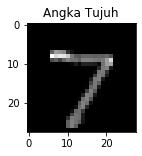

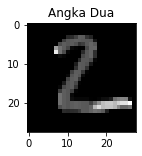

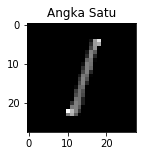

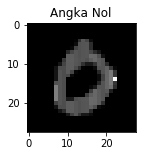

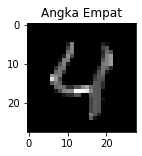

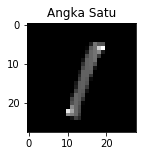

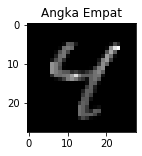

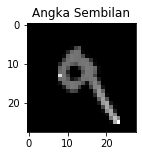

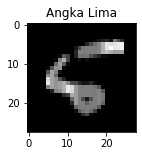

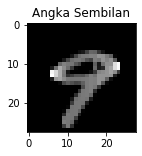

In [11]:
# Membuat dict label untuk gambar

label = {
    0 : "Nol",
    1 : "Satu",
    2 : "Dua",
    3 : "Tiga",
    4 : "Empat",
    5 : "Lima",
    6 : "Enam",
    7 : "Tujuh",
    8 : "Delapan",
    9 : "Sembilan"
}

# Melakukan prediksi pada lima gambar pertama di dalam X_test

prediksi = model.predict(x=X_test)

print("Dimensi prediksi\t=",np.array(prediksi).shape)

i = 0

for gambar in X_test[0:10]:
    label_prediksi = np.argmax(prediksi[i])
    plt.figure(figsize=[2,2])
    plt.imshow(gambar, cmap="gray")
    plt.title("Angka " + str(label[label_prediksi]))
    plt.show()
    i += 1